# PRÁCTICA FINAL APRENDIZAJE AUTOMÁTICO

## Cristina Ballesteros Samas y Lucía Hernáez Magán

### 0. Selección y carga de la base de datos

In [180]:
### Aquí meter una introducción poniendo porque hemos elegido esta base de datos y las 
### meter también las posibles preguntas que nos vamos a plantear y los
## problemas que queremos resolver...

Nuestro objetivo con este trabajo es evaluar como de bueno es el precio de un determinado apartamento según sus características. Para ello trataremos de implementar un algoritmo (trataremos de hacerlo tanto con una red neuronal como con otros métodos de clasificación como la regresión logística o el análisis discriminante) que nos permita clasificar los apartamentos en:
- Precio justo: En los casos en los que el precio sea acorde a las características del apartamento.
- Super Precio: En los casos en los que el apartamento tenga un precio inferior al esperado dado las características de este.
- Timo: Cuando el precio sea demasiado alto para las características del piso.


Cargamos las librerías más comunes que vamos a utilizar, posteriormente cargaremos más en caso de que sean necesarias, y también cargamos la base de datos.

In [181]:
import numpy  as np  
import pandas as pd

In [182]:
df=pd.read_csv("airbnb-listings-extract.csv", sep =";")

In [183]:
df.head().T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Observamos que nuestros datos están formados por 14780 observaciones y por 89 variables distintas de tipos int , object y float. Por tanto dada la gran cantidad de variables, nuestro primer objetivo será quedarnos únicamente con aquellas que sean significantes para nuestro análisis. La primera observación que hacemos es que existen algunas variables que tienen muchos datos nulos, por ello eliminamos todas las que tengan muchas observaciones nulas, estas son: 'Jurisdiction Names','License','Has Availability','Square Feet'y 'Host Acceptance Rate'.

In [185]:
df=df.drop([ 'Jurisdiction Names','License','Has Availability','Square Feet','Host Acceptance Rate'],axis=1)

A simple vista creemos que algunas de las variables no son relevantes en nuestro estudio así que las eliminamos:

In [186]:
df = df.drop(['Listing Url', 'ID' ,'Scrape ID', 'Last Scraped', 'Name', 'Summary',
              'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
              'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
              'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
              'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
              'Host About', 'Host Response Time', 'Host Response Rate',
              'Host Thumbnail Url', 'Host Picture Url',
              'Host Neighbourhood', 'Host Listings Count',
              'Host Total Listings Count', 'Host Verifications','Neighbourhood Cleansed',
              'Neighbourhood Group Cleansed','Geolocation' ], axis=1)

In [187]:
df.head().T

,0,1,2,3,4
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca..."
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
State,TX,Barcelona,Barcelona,Barcelona,Catalunya
Zipcode,78733,08010,08008,08009,08036
Market,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Smart Location,"Austin, TX","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain"
Country Code,US,ES,ES,ES,ES
Country,United States,Spain,Spain,Spain,Spain
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685


Hecho esto se nos ocurren algunas ideas para el resto de variables:
   - Las variables que parecen ser más significativas para evaluar el precio son las siguientes: 'Property Type', 'Room Type', 'Accommodates', Bedrooms','Beds', 'Bathrooms', 'Neighbourhood', 'Amenities', 'Review Scores Rating' y 'Availability 365'.
   - Combinar las variables de Review Scores y number of reviews para crear una nueva variable llamada valoración media.
   - Estudiar todas las variables relativas al precio para calcular un precio único por día y por persona (sumando el precio de limpieza e incluyendo la posibilidad de que la fianza no sea devuelta).
   - Tranformar y combunar algunas variables para facilitar el análisis, por ejemplo podemos sustituir las variables máximo y mínimo número de noches por otra variable llamada restricciones que valga 1 si existen restricciones y cero en caso contrario.

Esto solo son unas primeras aproximaciones e hipotesis que comprobaremos posteriormente con los métodos correspondientes.

### 1. Preparación de la base de datos. Análisis Exploratorio.

### 1.1. Análisis Faltantes

Nuestro primer paso en el análisis exploratorio será estudiar la existencia de datos nulos y en su caso tratarlos.

In [188]:
df.isna().any()

Street                            False
Neighbourhood                      True
City                               True
State                              True
Zipcode                            True
Market                             True
Smart Location                    False
Country Code                      False
Country                            True
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Weekly Price                       True
Monthly Price                      True
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False


Observamos que la gran mayoría de variables presentan datos nulos.
De entre de entre las variables: 'Neighbourhood', 'City', 'State','Zipcode', 'Market'y'Smart Location', podemos eliminar todas salvo una pues nos aportan una información muy similar. Dado que la única que no presenta datos nulos es 'Smart Location' nos quedaremos con ella.

In [189]:
df = df.drop(['Neighbourhood', 'City', 'State','Zipcode', 'Market'], axis=1)

Además eliminamos la variable 'Country' por ser linealmente dependiente de 'Country Code' y presentra faltantes.

In [190]:
df = df.drop(['Country'], axis=1)

De entre el resto de variables que presentan datos nulos eliminamos además 'First Review' puesto que no es relevante cuando se hizo la primera review, sí lo es cuando se hizo la última. También eliminamos 'Reviews per Month'.

In [191]:
df = df.drop([ 'First Review', 'Reviews per Month'], axis=1)

In [192]:
df.isna().any()

Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Price                              True
Weekly Price                       True
Monthly Price                      True
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False
Availability 60                   False


Observamos que la lista de variables que presentan datos nulos se ha reducido, sin embargo; aún hay una gran cantidad de variables con missings. Para acabar con este problema usaremos la clase Imputer de sklearn y susutituiremos los datos nulos por la mediana. Este procedimiento solo sirve para las variables que no son objects, estás últimas las trataremos individualmente.

Antes de proceder con el algoritmo debemos tener en cuenta algunas caracteristicas que hasta ahora habiamos pasado por alto debido a que consideramos interesante incluirlas en el análisis de precios :
- Las variables Weekly Price y Monthly Price presentaban aproximadamente un 25% de datos no nulos, una cifra muy baja que al imputar los faltantes posiblemente genere una distorsión de los resultados.
- Las variable Security Deposit presenta menos del 50% de los datos no nulos, por lo que imputar faltantes también va a perjudicar a las predicciones.
     
Por ello eliminamos de nuestro análisis estas tres variables.

In [193]:
df=df.drop(['Weekly Price','Monthly Price','Security Deposit'],axis=1)

In [194]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [195]:
df_num = df.select_dtypes(exclude=['object'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        14780 non-null  float64
 1   Longitude                       14780 non-null  float64
 2   Accommodates                    14780 non-null  int64  
 3   Bathrooms                       14725 non-null  float64
 4   Bedrooms                        14755 non-null  float64
 5   Beds                            14731 non-null  float64
 6   Price                           14763 non-null  float64
 7   Cleaning Fee                    8687 non-null   float64
 8   Guests Included                 14780 non-null  int64  
 9   Extra People                    14780 non-null  int64  
 10  Minimum Nights                  14780 non-null  int64  
 11  Maximum Nights                  14780 non-null  int64  
 12  Availability 30                 

In [196]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [197]:
df_num_nonan = imputer.transform(df_num)

In [198]:
df_ = pd.DataFrame(df_num_nonan, columns=df_num.columns)

In [199]:
df[df_num.columns]=df_
df.isna().any()

Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                          True
Price                             False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False
Availability 60                   False
Availability 90                   False
Availability 365                  False
Calendar last Scraped             False


Observamos que hemos conseguido eliminar los datos missing de las variables numéricas pero aún quedan los de las variables categóricas. Vamos a tratar de eliminarlos también.

In [200]:
df_cat_na=df[['Amenities', 'Last Review','Features']]
df_cat_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Amenities    14610 non-null  object
 1   Last Review  11617 non-null  object
 2   Features     14779 non-null  object
dtypes: object(3)
memory usage: 346.5+ KB


Observamos que la variable 'Last Review' presenta bastantes menos datos missing que las variables anteriormente eliminadas pero un gran número aún así. Por ello también la eliminamos. Por último para acabar definitivamente con los missings eliminamos las filas correspondientes a los datos nulos.

In [201]:
df=df.drop(['Last Review'], axis=1)

In [202]:
df=df.dropna()

In [203]:
df.isna().any()

Street                            False
Smart Location                    False
Country Code                      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False
Availability 60                   False
Availability 90                   False
Availability 365                  False
Calendar last Scraped             False


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14609 entries, 0 to 14779
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Street                          14609 non-null  object 
 1   Smart Location                  14609 non-null  object 
 2   Country Code                    14609 non-null  object 
 3   Latitude                        14609 non-null  float64
 4   Longitude                       14609 non-null  float64
 5   Property Type                   14609 non-null  object 
 6   Room Type                       14609 non-null  object 
 7   Accommodates                    14609 non-null  float64
 8   Bathrooms                       14609 non-null  float64
 9   Bedrooms                        14609 non-null  float64
 10  Beds                            14609 non-null  float64
 11  Bed Type                        14609 non-null  object 
 12  Amenities                       

Finalmente hemos conseguido eliminar todo los datos missing y nos hemos quedado con 14609 observaciones y 37 variables.

### 1.2. Análisis Duplicados

Prosiguiendo con nuestro análisis exploratorio estudiamos la existencia de datos duplicados y los eliminamos en caso de que sea necesario.

In [205]:
df.duplicated().sum()

0

Observamos que no existen datos duplicados, por tanto no tenemos que eliminarlos.

### 1.3. Tranformación de variables.

Hasta ahora hemos reducido la dimensionalidad de nuestro problema únicamente mediante metodos de seleccion filter de variables, es decir; únicamente hemos utilizado la información dada por las variables para seleccionar las que hemos considerado más adecuadas. En este apartado trataremos de seguir reduciendo la dimensionalidad pero ahora mediante la trasformación de algunas variables.

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14609 entries, 0 to 14779
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Street                          14609 non-null  object 
 1   Smart Location                  14609 non-null  object 
 2   Country Code                    14609 non-null  object 
 3   Latitude                        14609 non-null  float64
 4   Longitude                       14609 non-null  float64
 5   Property Type                   14609 non-null  object 
 6   Room Type                       14609 non-null  object 
 7   Accommodates                    14609 non-null  float64
 8   Bathrooms                       14609 non-null  float64
 9   Bedrooms                        14609 non-null  float64
 10  Beds                            14609 non-null  float64
 11  Bed Type                        14609 non-null  object 
 12  Amenities                       

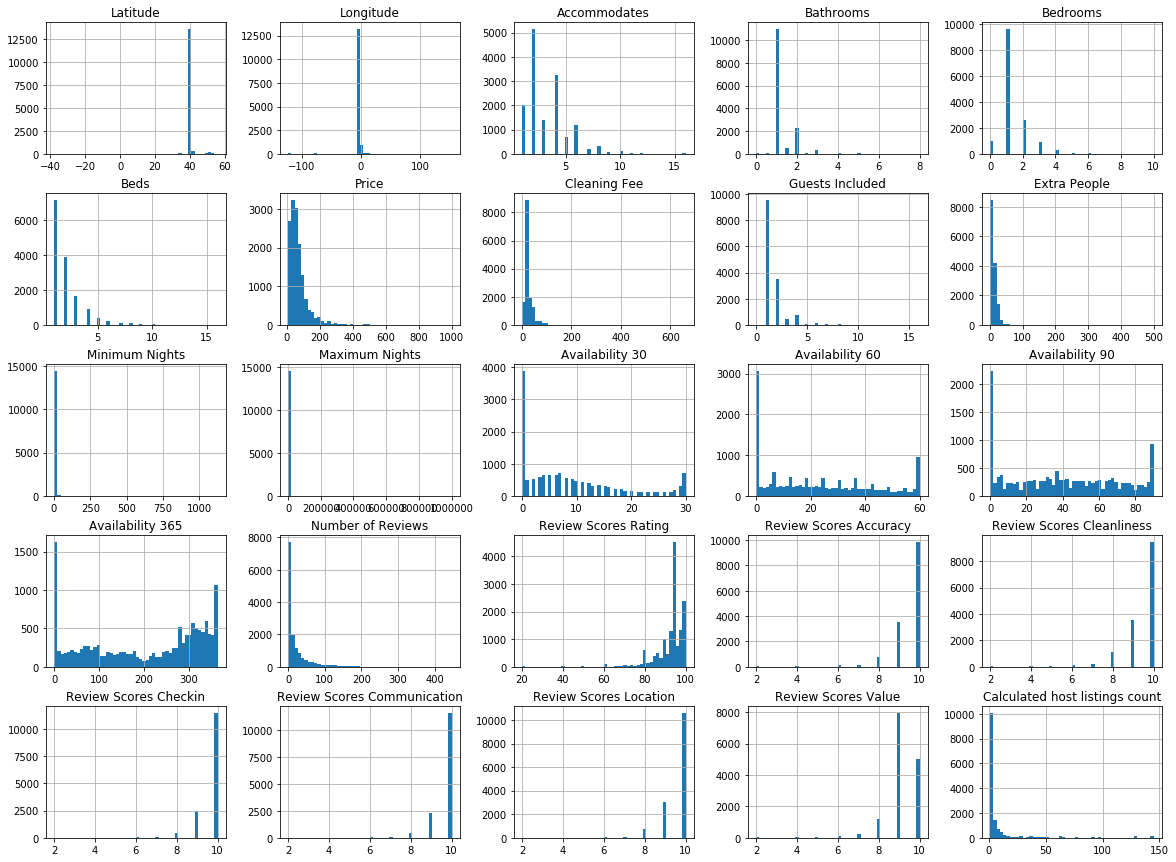

In [207]:
import matplotlib.pyplot as plt
# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

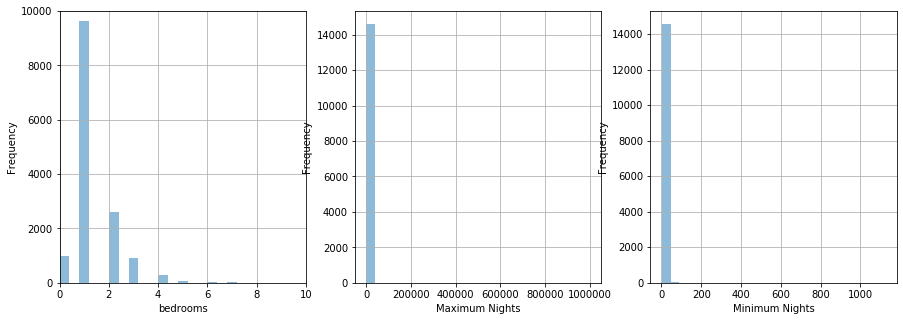

In [208]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(1,3,2)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

plt.subplot(1,3,3)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

plt.show()

Observamos que maximun nights y minimun nights parecen tomar muchos valores en 1.  Esto se puede interpretar como que no hay una restricción específica en la cantidad máxima de noches que un huésped puede reservar esa propiedad. En otras palabras, un huésped podría reservar esa propiedad por cualquier cantidad de noches, desde una sola noche hasta el tiempo que desee. Parece buena idea crear una nueva variable que me indique con valor 1 si la vivienda posee alguna restricccion del número de noches a reservar o si no.

In [211]:
df['Maximum Nights'].value_counts().sort_index()

1.0           16
2.0           34
3.0          103
4.0           90
5.0          119
            ... 
11111.0        2
30000.0        1
99999.0        4
100000.0       1
1000000.0      1
Name: Maximum Nights, Length: 173, dtype: int64

In [212]:

# Crear la nueva variable que indica si hay restricción
df['restriction'] = (df['Maximum Nights'] > 1) & (df['Minimum Nights'] > 1)

# Convertir los valores booleanos en enteros
df['restriction'] = df['restriction'].astype(int)

In [213]:
df['restriction'].value_counts()

1    9727
0    4882
Name: restriction, dtype: int64

In [214]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                             1.000000
Accommodates                      0.570302
Bedrooms                          0.538048
Cleaning Fee                      0.500103
Beds                              0.485861
Bathrooms                         0.420844
Guests Included                   0.332644
Calculated host listings count    0.245824
restriction                       0.161211
Extra People                      0.145610
Review Scores Location            0.093334
Review Scores Cleanliness         0.078740
Availability 30                   0.070093
Review Scores Accuracy            0.062362
Review Scores Rating              0.058380
Availability 365                  0.051226
Minimum Nights                    0.034408
Availability 60                   0.032290
Review Scores Communication       0.018501
Review Scores Checkin             0.006503
Review Scores Value               0.006340
Availability 90                   0.001467
Maximum Nights                    0.001203
Longitude  

Observamos que muchas variables no presnetan practicamnete correlacion con la variable a predecir. Consideraremos variables queno paortan informacion sobr ele precio aquellas variable con una correlación con Price inferior a 0.07

Eliminaremos las variables Review Scores Accuracy, Review Scores Rating, Availability 365, Minimum Nights, Availability 60,
Review Scores Communication,Review Scores Checkin , Review Scores Value, Availability 90, Maximum Nights, Longitude, Latitude, Number of Reviews

In [215]:
df=df.drop(['Review Scores Accuracy','Review Scores Rating','Availability 365','Minimum Nights', 'Availability 60', 'Review Scores Communication', 'Review Scores Checkin','Review Scores Value', 'Availability 90', 'Maximum Nights', 'Longitude', 'Latitude', 'Number of Reviews'  ],axis=1)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Availability 30,Review Scores Cleanliness,Review Scores Location,Calculated host listings count,restriction
Accommodates,1.000000,0.431118,0.724306,0.838638,0.570302,0.299092,0.569832,0.224076,-0.009949,-0.044241,-0.011788,0.254041,0.153573
Bathrooms,0.431118,1.000000,0.525383,0.473803,0.420844,0.225104,0.244944,0.088624,0.045237,0.033616,0.027494,0.287757,0.080652
Bedrooms,0.724306,0.525383,1.000000,0.732411,0.538048,0.301158,0.443095,0.128073,0.038544,0.006180,-0.023602,0.219177,0.126161
Beds,0.838638,0.473803,0.732411,1.000000,0.485861,0.261362,0.465945,0.160680,0.050005,-0.029160,-0.031492,0.218952,0.104922
Price,0.570302,0.420844,0.538048,0.485861,1.000000,0.500103,0.332644,0.145610,0.070093,0.078740,0.093334,0.245824,0.161211
Cleaning Fee,0.299092,0.225104,0.301158,0.261362,0.500103,1.000000,0.185695,0.218672,0.010142,0.046232,0.047822,0.196120,0.139143
Guests Included,0.569832,0.244944,0.443095,0.465945,0.332644,0.185695,1.000000,0.314226,-0.042807,-0.010375,0.002091,0.094546,0.124591
Extra People,0.224076,0.088624,0.128073,0.160680,0.145610,0.218672,0.314226,1.000000,0.059379,0.003016,0.017925,0.011617,0.008736
Availability 30,-0.009949,0.045237,0.038544,0.050005,0.070093,0.010142,-0.042807,0.059379,1.000000,-0.013499,-0.054432,0.008332,-0.140298
Review Scores Cleanliness,-0.044241,0.033616,0.006180,-0.029160,0.078740,0.046232,-0.010375,0.003016,-0.013499,1.000000,0.384861,-0.015678,0.037128


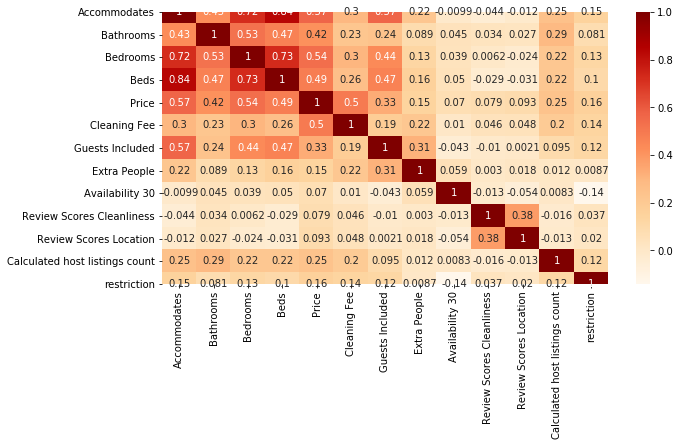

In [216]:
import seaborn as sns
plt.figure(figsize=(10,5))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="OrRd",annot=True)
correlaciones

Observamos qu ebed y bedrroms estan altamente correladas entre si esto tiene sentido y parece que etsamos dos variables que nen cierto modo me paortan la misma información. Así que creare una nueva variable que las unifique

In [217]:
# Crear la nueva variable que une las variables "bedrooms" y "beds"
df['total_sleeping_spaces'] = df['Bedrooms'] + df['Beds']

#eliminamos las ods variables
df=df.drop(['Bedrooms', 'Beds' ],axis=1)

In [218]:
print('Cantidad de Filas y columnas:',df.shape)
l=df.columns
print('Nombre columnas:',l)
lista1=enumerate(l)


Cantidad de Filas y columnas: (14609, 23)
Nombre columnas: Index(['Street', 'Smart Location', 'Country Code', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bed Type', 'Amenities',
       'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Calendar Updated', 'Availability 30', 'Calendar last Scraped',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Cancellation Policy', 'Calculated host listings count', 'Features',
       'restriction', 'total_sleeping_spaces'],
      dtype='object')


### 1.3.1. Transformación de varaibles categóricas.

Para poder llevar a cabo nuestra predicción tenemos además que transformar todas las variables catégoricas en numéricas.Esto lo haremos usando la herramienta LabelEncoder excepto para las variables 'Amenities' y 'Features'.

Para la variable Amenities y Features podemos contar el número de elementos que tiene cada una de estás variables, de esta manera cuantos mas elementos mejor.


In [227]:
#lo hacemos mejro con getdummies
df_encoded = pd.get_dummies(df, columns=['Amenities', 'Features'])
df=df.drop(['Amenities', 'Features' ],axis=1)


In [228]:
df_encoded

,Street,Smart Location,Country Code,Property Type,Room Type,Accommodates,Bathrooms,Bed Type,Price,Cleaning Fee,...,"Features_Host Is Superhost,Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable,Require Guest Profile Picture,Require Guest Phone Verification","Features_Host Is Superhost,Host Has Profile Pic,Is Location Exact,Requires License,Require Guest Phone Verification","Features_Host Is Superhost,Host Has Profile Pic,Is Location Exact,Requires License,Require Guest Profile Picture,Require Guest Phone Verification","Features_Host Is Superhost,Host Has Profile Pic,Requires License","Features_Host Is Superhost,Host Has Profile Pic,Requires License,Instant Bookable","Features_Host Is Superhost,Host Has Profile Pic,Requires License,Require Guest Profile Picture,Require Guest Phone Verification","Features_Is Location Exact,Requires License","Features_Is Location Exact,Requires License,Instant Bookable",Features_Requires License,"Features_Requires License,Instant Bookable"
0,"Canyon Edge Drive, Austin, TX 78733, United St...","Austin, TX",US,Loft,Entire home/apt,2.0,1.0,Real Bed,58.0,25.0,...,0,0,0,0,0,0,0,0,0,0
1,"Barcelona, Barcelona 08010, Spain","Barcelona, Spain",ES,Apartment,Entire home/apt,4.0,1.0,Real Bed,70.0,40.0,...,0,0,0,0,0,0,0,0,0,0
2,"Barcelona, Barcelona 08008, Spain","Barcelona, Spain",ES,Apartment,Entire home/apt,4.0,1.0,Real Bed,70.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,"Barcelona, Barcelona 08009, Spain","Barcelona, Spain",ES,Apartment,Entire home/apt,8.0,2.0,Real Bed,229.0,79.0,...,0,0,0,0,0,0,0,0,0,0
4,"L'Antiga Esquerra de l'Eixample, Barcelona, Ca...","Barcelona, Spain",ES,Apartment,Entire home/apt,5.0,1.0,Real Bed,149.0,55.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,"Bedford-Stuyvesant, Brooklyn, NY 11213, United...","Brooklyn, NY",US,Apartment,Entire home/apt,2.0,1.0,Real Bed,90.0,60.0,...,0,0,0,0,0,0,0,0,0,0
14776,"Porte de Versailles, Paris, Île-de-France 7501...","Paris, France",FR,Bed & Breakfast,Private room,1.0,1.0,Real Bed,75.0,25.0,...,0,0,0,0,0,0,0,0,0,0
14777,"Paris, Île-de-France, France","Paris, France",FR,Apartment,Entire home/apt,5.0,1.0,Real Bed,100.0,40.0,...,0,0,0,0,0,0,0,0,0,0
14778,"Gaylord Street, Denver, CO 80206, United States","Denver, CO",US,Apartment,Entire home/apt,4.0,1.0,Real Bed,99.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Creamos una funcion que cuente los elementos
def count_elements(s):
    return len(s.split(','))
# Aplicar la función a cada fila del DataFrame
df['Amenities_cat'] = df['Amenities'].astype(str).apply(count_elements)
df['Features_cat'] = df['Features'].astype(str).apply(count_elements)
# Eliminar las columnas 'Amenities_cat' y 'Features_cat'
df=df.drop(['Amenities','Features'], axis=1)
# Imprimir el DataFrame con la nueva columna
df.T

,0,1,2,3,4,5,6,7,8,9,...,14770,14771,14772,14773,14774,14775,14776,14777,14778,14779
ID,11210388.0,17471131.0,17584891.0,5398030.0,18104606.0,15695269.0,1295958.0,1349311.0,15698621.0,6766647.0,...,16877299.0,4152647.0,1501761.0,1010498.0,6292515.0,2098030.0,17989442.0,13278634.0,10733941.0,4637801.0
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca...","La Nova Esquerra de l'Eixample, Barcelona, Cat...","el Fort Pienc, Barcelona, Catalonia 08013, Spain","La Sagrada Família, Barcelona, Catalonia 08025...","El Camp de l'Arpa del Clot, Barcelona, Catalun...","Enfield Road, Austin, TX 78703, United States",...,"Sineu, Illes Balears 07510, Spain","Pina, Balearic Islands 07220, Spain","Petra, Balearic Islands 07520, Spain","Balearic Islands, Balearic Islands, Spain","Ditmars / Steinway, Queens, NY 11105, United S...","Bedford-Stuyvesant, Brooklyn, NY 11213, United...","Porte de Versailles, Paris, Île-de-France 7501...","Paris, Île-de-France, France","Gaylord Street, Denver, CO 80206, United States","35th Avenue Northeast, Seattle, WA 98105, Unit..."
Smart Location,"Austin, TX","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Barcelona, Spain","Austin, TX",...,"Sineu, Spain","Pina, Spain","Petra, Spain","Balearic Islands, Spain","Queens, NY","Brooklyn, NY","Paris, France","Paris, France","Denver, CO","Seattle, WA"
Country Code,US,ES,ES,ES,ES,ES,ES,ES,ES,US,...,ES,ES,ES,ES,US,US,FR,FR,US,US
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685,41.382537,41.399058,41.402357,41.407356,30.287124,...,39.646497,39.595354,39.604911,39.740432,40.771787,40.678945,48.836197,48.888809,39.742205,47.672327
Longitude,-97.863277,2.172625,2.162173,2.167418,2.15515,2.149577,2.184229,2.171119,2.182982,-97.768164,...,2.992312,2.927612,3.097125,2.931212,-73.898799,-73.939342,2.294045,2.316173,-104.959933,-122.291451
Property Type,Loft,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,House,...,House,House,House,House,Apartment,Apartment,Bed & Breakfast,Apartment,Apartment,House
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room
Accommodates,2.0,4.0,4.0,8.0,5.0,6.0,5.0,2.0,6.0,6.0,...,8.0,2.0,10.0,8.0,1.0,2.0,1.0,5.0,4.0,2.0
Bathrooms,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0


Además la variable 'Street' parece que va a aportar mucha variabilidad, por tanto va a debilitar nuestras predicciones, por ello la eliminamos.

In [34]:
df=df.drop(['Street'],axis=1)

### 1.4. Detección y tratamiento de Outliers.

## 2. Calculo del precio dadas las características.

Nuestro problema inicial es tratar de determinar el precio de un apartamento dadas las característica de este. Como ya sabemos existen varios métodos para realizar este procedimiento. En nuestro caso particular trataremos de hacerlo mediante dos métodos distintos, en primer lugar con una regresión lineal y en segundo lugar con una red neuronal. 

### 2.1. División del conjunto de datos.

Como es habitual en los problemas de predicción, en este primer paso dividimos los datos en tres subconjuntos entrenamiento, validación y test. Para ello usamos la función train_val_test_split.

In [35]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.3, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [36]:
from sklearn.model_selection import train_test_split
train_set, val_set, test_set = train_val_test_split(df)

A continuación separamos las etiquetas de las características de entrada para cada uno de los subconjuntos.

In [37]:
# Conjunto de datos general
X_df = df.drop("Price", axis=1)
y_df = df["Price"].copy()

In [38]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Price", axis=1)
y_train = train_set["Price"].copy()

In [39]:
# Conjunto de datos de validación
X_val = val_set.drop("Price", axis=1)
y_val = val_set["Price"].copy()

In [40]:
# Conjunto de datos de pruebas
X_test = test_set.drop("Price", axis=1)
y_test = test_set["Price"].copy()

In [41]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos validacion: ', X_val.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (10226, 34)
Datos validacion:  (2191, 34)
Datos test:  (2192, 34)


### 2.2. Regresión Lineal.

Para mejorar la predicción de nuestro modelo transformamos la variable dependiente 'Price' en logaritmo.

In [42]:
y_df=np.log(y_df)
y_train=np.log(y_train)
y_val=np.log(y_val)
y_test=np.log(y_test)

Ahora procedemos a estimar nuestro modelo de regresión lineal:

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'Madrid, Spain'

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
y_pred_val=reg.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#RMSE
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

#MAE
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
val_mae = mean_absolute_error(y_val, y_pred_val)

#R2
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
val_r2 =r2_score(y_val, y_pred_val)

In [ ]:
print("Vemos como de bueno es el entrenamiento:")
print("El Rmse del entrenamiento del modelo es:", train_rmse)
print("El mae del entrenamiento del modelo es:", train_mae)
print("El R2 del entrenamiento del modelo es:", train_r2)

In [ ]:
print("RMSE:")
print("El Rmse del test del modelo es:",test_rmse)
print("El Rmse de la validación del modelo es:",val_rmse)
print("MAE:")
print("El mae del test del modelo es:",test_mae)
print("El mae de la validación del modelo es:",val_mae)
print("R2:")
print("El R2 del test del modelo es:",test_r2)
print("El R2 de la validación del modelo es:",val_r2)

### 2.3. Red Neuronal.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', 'mse'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

In [ ]:
train_loss, train_mae, train_mse = model.evaluate(X_train, y_train)
val_loss, val_mae, val_mse = model.evaluate(X_val, y_val)
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)

In [ ]:
print('Train MAE:', train_mae)
print('Train MSE:', train_mse)
print('Validation MAE:', val_mae)
print('Validation MSE:', val_mse)
print('Test MAE:', test_mae)
print('Test MSE:', test_mse)

## 3. Clasificador dado el precio y las características.

A partir de los resultados obtenidos por la red neuronal en el apartado 2 vamos a tratar de realizar un problema de clasificación mediante otra red neuronal. Para ello crearemos unos umbrales para los cuales nuestra red clasificara las ofertas de apartamento en tres grupos:
 - Super Precio
 - Timo
 - Precio Justo

## 4. Conclusión.